In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from adjustText import adjust_text
import random

In [4]:
df = pd.read_csv('DE_results.csv').dropna()
df['nlog10'] = -np.log10(df.padj)
df.head()

,Unnamed: 0,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,symbol,nlog10
0,ENSG00000160072,320.481168,-0.492442,0.165330,-2.978533,0.002896,0.036899,ATAD3B,1.432991
1,ENSG00000041988,103.354977,-0.282331,0.168099,-1.679553,0.093044,0.359646,THAP3,0.444125
2,ENSG00000225630,922.811465,0.733032,0.375566,1.951807,0.050961,0.256948,MTND2P28,0.590154
3,ENSG00000131584,735.890219,-0.053477,0.219621,-0.243496,0.807621,0.938042,ACAP3,0.027778
4,ENSG00000169972,135.304763,-0.154869,0.187044,-0.827982,0.407681,0.727888,PUSL1,0.137935


In [8]:

#picked1 and picked2 simulate user lists of genes to label by color
picked1 = random.choices(df.symbol.tolist(), weights = df.nlog10.tolist(), k = 250)
picked2 = random.choices(df.symbol.tolist(), weights = df.nlog10.tolist(), k = 300)
picked2 = [x for x in picked2 if x not in picked1]

def map_color(a):
    log2FoldChange, symbol, nlog10 = a
    
    if abs(log2FoldChange) < 1 or nlog10 < 2:
        return 'nobody_cares'
    if symbol in picked1:
        return 'picked1'
    if symbol in picked2:
        return 'picked2'
    
    return 'i_care'

df['color'] = df[['log2FoldChange', 'symbol', 'nlog10']].apply(map_color, axis = 1)

,Unnamed: 0,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,symbol,nlog10,color
0,ENSG00000160072,320.481168,-0.492442,0.165330,-2.978533,0.002896,0.036899,ATAD3B,1.432991,nobody_cares
1,ENSG00000041988,103.354977,-0.282331,0.168099,-1.679553,0.093044,0.359646,THAP3,0.444125,nobody_cares
2,ENSG00000225630,922.811465,0.733032,0.375566,1.951807,0.050961,0.256948,MTND2P28,0.590154,nobody_cares
3,ENSG00000131584,735.890219,-0.053477,0.219621,-0.243496,0.807621,0.938042,ACAP3,0.027778,nobody_cares
4,ENSG00000169972,135.304763,-0.154869,0.187044,-0.827982,0.407681,0.727888,PUSL1,0.137935,nobody_cares


In [12]:
#picked3 and picked24 simulate user lists of genes to label by shape

picked3 = random.choices(df.symbol.tolist(), weights = df.nlog10.tolist(), k = 250)
picked4 = random.choices(df.symbol.tolist(), weights = df.nlog10.tolist(), k = 300)
picked4 = [x for x in picked4 if x not in picked3]

def map_shape(symbol):
    if symbol in picked3:
        return 'picked3'
    if symbol in picked4:
        return 'picked4'
    
    return 'not_important'

df['shape'] = df.symbol.map(map_shape)
df.head()

,Unnamed: 0,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,symbol,nlog10,color,shape
0,ENSG00000160072,320.481168,-0.492442,0.165330,-2.978533,0.002896,0.036899,ATAD3B,1.432991,nobody_cares,not_important
1,ENSG00000041988,103.354977,-0.282331,0.168099,-1.679553,0.093044,0.359646,THAP3,0.444125,nobody_cares,not_important
2,ENSG00000225630,922.811465,0.733032,0.375566,1.951807,0.050961,0.256948,MTND2P28,0.590154,nobody_cares,not_important
3,ENSG00000131584,735.890219,-0.053477,0.219621,-0.243496,0.807621,0.938042,ACAP3,0.027778,nobody_cares,not_important
4,ENSG00000169972,135.304763,-0.154869,0.187044,-0.827982,0.407681,0.727888,PUSL1,0.137935,nobody_cares,not_important


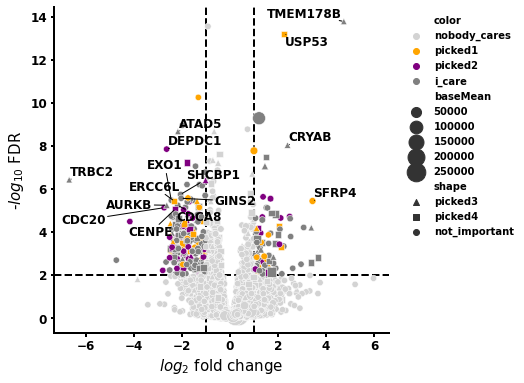

In [29]:
plt.figure(figsize = (6,6))

ax = sns.scatterplot(data = df, x = 'log2FoldChange', y = 'nlog10',
                    hue = 'color', hue_order = ['nobody_cares', 'picked1', 'picked2', 'i_care'],
                    palette = ['lightgrey', 'orange', 'purple', 'grey'],
                    style = 'shape', style_order = ['picked3', 'picked4', 'not_important'],
                    markers = ['^', 's', 'o'], 
                    size = 'baseMean', sizes = (40, 400))

ax.axhline(2, zorder = 0, c = 'k', lw = 2, ls = '--')
ax.axvline(1, zorder = 0, c = 'k', lw = 2, ls = '--')
ax.axvline(-1, zorder = 0, c = 'k', lw = 2, ls = '--')



texts = []
for i in range(len(df)):
    if df.iloc[i].nlog10 > 5 and abs(df.iloc[i].log2FoldChange) > 2:
        texts.append(plt.text(x = df.iloc[i].log2FoldChange, y = df.iloc[i].nlog10, s = df.iloc[i].symbol,
                             fontsize = 12, weight = 'bold'))
        
adjust_text(texts, arrowprops = dict(arrowstyle = '-', color = 'k'))





plt.legend(loc = 1, bbox_to_anchor = (1.4,1), frameon = False, prop = {'weight':'bold'})

for axis in ['bottom', 'left']:
    ax.spines[axis].set_linewidth(2)
    
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(width = 2)

plt.xticks(size = 12, weight = 'bold')
plt.yticks(size = 12, weight = 'bold')

plt.xlabel("$log_{2}$ fold change", size = 15)
plt.ylabel("-$log_{10}$ FDR", size = 15)

plt.savefig('volcano.png', dpi = 300, bbox_inches = 'tight', facecolor = 'white')

plt.show()